In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from ml_statistical_features import load_data_as_dataframe
from data_preparation import Data
import utils

plt.rcParams.update(utils.get_plt_settings())

save=True

In [2]:
def print_3bpm_coverage(data):
    all_data_3bpm = len(data[data['abs_err'] < 3])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_3bpm = len(data_inf[data_inf['abs_err'] < 3])
    print("3pm coverage auf allen Segmenten: %.2f" % (100/all_data * all_data_3bpm))
    print("3pm coverage auf informativen Segmenten: %.2f" % (100/len(data_inf.index) * inf_data_3bpm))

In [3]:
def bland_altman_plot(data1, data2):
    data1  = np.asarray(data1) 
    data2  = np.asarray(data2) 
    mean  = np.mean([data1, data2], axis=0) 
    diff  = data1 - data2     # Difference between data1 and data2 
    md  = np.mean(diff)     # Mean of the difference 
    sd  = np.std(diff, axis=0)   # Standard deviation of the difference
    
    plt.figure(figsize=(utils.get_plt_big_size()))

    plt.scatter(mean, diff, s=1.0) 
    plt.axhline(md,   color='gray', linestyle='--') 
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--') 
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("$0.5 * (hr\\textsubscript{ECG} + hr\\textsubscript{BCG})$")
    plt.ylabel("$ecg_hr - bcg_hr$")

In [4]:
def print_5bpm_coverage(data):
    all_data_5bpm = len(data[data['abs_err'] < 5])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_5bpm = len(data_inf[data_inf['abs_err'] < 5])
    print("5pm coverage auf allen Segmenten: %.2f" % (100/all_data * all_data_5bpm))
    print("5pm coverage auf informativen Segmenten: %.2f" % (100/len(data_inf.index) * inf_data_5bpm))

In [5]:
def print_hr_stats(data):
    print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())
    
    inf_data = data[data['informative']]
    print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: %.2f bpm" % inf_data['bcg_hr'].mean())
    print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: %.2f bpm" % inf_data['ecg_hr'].mean())
    print("Durchschnittliche absolute Abweichung bei informativen Segmenten: %.2f bpm" % inf_data['abs_err'].mean())
    print("Durchschnittliche relative Abweichung bei informativen Segmenten: %.2f" % inf_data['rel_err'].mean(), "%")
    

    print("Durchschnittliche Herzrate nach EKG: %.2f bpm" % data['ecg_hr'].mean())

In [6]:
def print_distribution_stats(data):
    count_overall = len(data.index)
    count_informativ = len(data[data['informative']])
    percentage_informative = count_informativ/count_overall*100
    percentage_non_informative = 100 - percentage_informative
    print("insgesamt: %i, informativ: %.2f %s, nicht informativ: %.2f %s" % (count_overall, percentage_informative, "%", percentage_non_informative, "%"))
    return percentage_informative, percentage_non_informative

# 10 % / 5 bpm

In [7]:
data_10 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10), index_col=False)

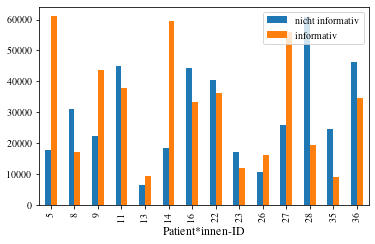

In [8]:
pd.crosstab(data_10['patient_id'],data_10['informative']).plot.bar(figsize=utils.get_plt_big_size())
plt.xlabel("Patient*innen-ID")
plt.legend(['nicht informativ', 'informativ'])
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'data-stats-10.pdf'), bbox_inches='tight', transparent=True, dpi=300)


/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


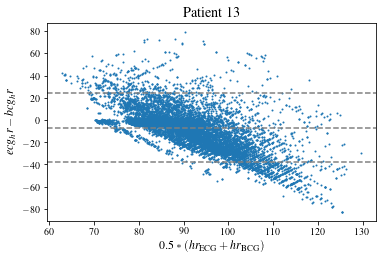

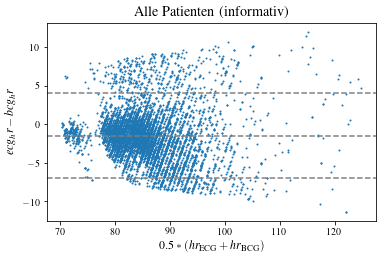

In [9]:
temp = data_10[data_10['patient_id']==13].copy()
temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Patient 13")
temp = temp[data_10['informative']]
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Alle Patienten (informativ)")
plt.show()

In [10]:
print_distribution_stats(data_10)

insgesamt: 857143, informativ: 51.98 %, nicht informativ: 48.02 %


(51.980008003332, 48.019991996668)

In [11]:
print_3bpm_coverage(data_10)

3pm coverage auf allen Segmenten: 41.33
3pm coverage auf informativen Segmenten: 79.52


In [12]:
print_5bpm_coverage(data_10)

5pm coverage auf allen Segmenten: 47.09
5pm coverage auf informativen Segmenten: 90.59


In [13]:
print_hr_stats(data_10)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten: 68.96 bpm
Durchschnittliche Herzrate nach EKG bei informativen Segmenten: 68.62 bpm
Durchschnittliche absolute Abweichung bei informativen Segmenten: 1.85 bpm
Durchschnittliche relative Abweichung bei informativen Segmenten: 2.60 %
Durchschnittliche Herzrate nach EKG: 71.93 bpm


# 15 % / 7,5bpm

In [14]:
data_15 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=15), index_col=False)

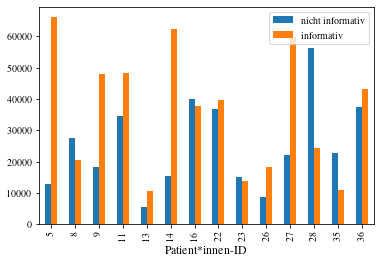

In [15]:
pd.crosstab(data_15['patient_id'],data_15['informative']).plot.bar(figsize=utils.get_plt_big_size())
plt.xlabel("Patient*innen-ID")
plt.legend(['nicht informativ', 'informativ'])
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'data-stats-15.pdf'), bbox_inches='tight', transparent=True, dpi=300)


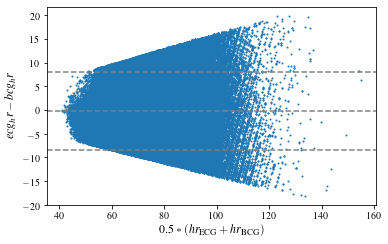

In [16]:
temp = data_15[data_15['informative']].copy()
temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])

In [17]:
print_distribution_stats(data_15)

insgesamt: 857143, informativ: 58.79 %, nicht informativ: 41.21 %


(58.78739020210163, 41.21260979789837)

In [18]:
print_3bpm_coverage(data_15)

3pm coverage auf allen Segmenten: 41.33
3pm coverage auf informativen Segmenten: 70.31


In [19]:
print_5bpm_coverage(data_15)

5pm coverage auf allen Segmenten: 47.09
5pm coverage auf informativen Segmenten: 80.10


In [20]:
print_hr_stats(data_15)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten: 69.77 bpm
Durchschnittliche Herzrate nach EKG bei informativen Segmenten: 69.64 bpm
Durchschnittliche absolute Abweichung bei informativen Segmenten: 2.76 bpm
Durchschnittliche relative Abweichung bei informativen Segmenten: 3.74 %
Durchschnittliche Herzrate nach EKG: 71.93 bpm


# 5 % / 2,5 bpm

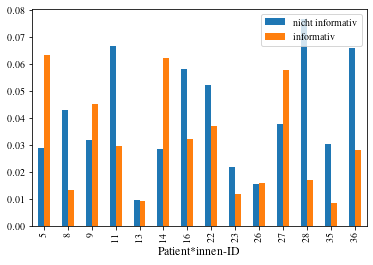

In [21]:
data_5 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=5), index_col=False)
pd.crosstab(data_5['patient_id'],data_5['informative'], normalize=True).plot.bar(figsize=utils.get_plt_big_size())
plt.xlabel("Patient*innen-ID")
plt.legend(['nicht informativ', 'informativ'])
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'data-stats-5.pdf'), transparent=True, bbox_inches='tight', dpi=300)

In [22]:
print_distribution_stats(data_5)

insgesamt: 857143, informativ: 43.21 %, nicht informativ: 56.79 %


(43.212392797934534, 56.787607202065466)

In [23]:
print_3bpm_coverage(data_5)

3pm coverage auf allen Segmenten: 41.33
3pm coverage auf informativen Segmenten: 95.00


In [24]:
print_5bpm_coverage(data_5)

5pm coverage auf allen Segmenten: 47.09
5pm coverage auf informativen Segmenten: 99.96


In [25]:
print_hr_stats(data_5)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten: 67.90 bpm
Durchschnittliche Herzrate nach EKG bei informativen Segmenten: 67.43 bpm
Durchschnittliche absolute Abweichung bei informativen Segmenten: 1.12 bpm
Durchschnittliche relative Abweichung bei informativen Segmenten: 1.64 %
Durchschnittliche Herzrate nach EKG: 71.93 bpm


insgesamt: 857143, informativ: 43.21 %, nicht informativ: 56.79 %
insgesamt: 857143, informativ: 51.98 %, nicht informativ: 48.02 %
insgesamt: 857143, informativ: 58.79 %, nicht informativ: 41.21 %


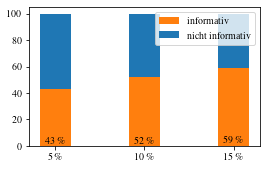

In [31]:
inf_5, non_inf_5 = print_distribution_stats(data_5)
inf_10, non_inf_10 = print_distribution_stats(data_10)
inf_15, non_inf_15 = print_distribution_stats(data_15)

inf = [inf_5, inf_10, inf_15]
non_inf = [non_inf_5, non_inf_10, non_inf_15]
ind = np.arange(3)
width=0.35

plt.figure(figsize=utils.get_plt_normal_size())
plt.bar(ind, inf, width, label="informativ", color='C1')
plt.bar(ind, non_inf, width, bottom=inf, label="nicht informativ")
for index,data in enumerate(inf):
    plt.text(x=index-0.12 , y =2 , s=f"{round(data)}\,\%", fontsize=10)
plt.xticks(ind, ('$5\,\%$', '10\,\%', '15\,\%'))
plt.legend()
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'label-distribution.pdf'), transparent=True, bbox_inches='tight', dpi=300)